# <font color='royalblue'> Pre-stimulation period characterization

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%run data_prep_functions.ipynb

In [2]:
# Learning curves
lc = pd.read_csv('E:\learning_curves_all_rats.csv', header=0)

# Test runs - for performance and latency calculations
test_runs = pd.read_csv("E:\POSITION DATA\PRE PROCESSED/test_runs.csv")
below15_runs = pd.read_csv("E:\POSITION DATA\PRE PROCESSED/below15_runs.csv")
lc.head().transpose()

,0,1,2,3,4
GROUP,NPHR,NPHR,NPHR,NPHR,NPHR
RAT,NPHR1,NPHR2,NPHR4,NPHR5,NPHR6
-10,NaN,NaN,70.0,NaN,55.0
-9,NaN,NaN,77.0,65.4,65.2
-8,NaN,NaN,70.0,83.3,70.3
-7,NaN,NaN,70.0,65.4,76.0
-6,NaN,NaN,77.0,75.0,65.0
-5,NaN,64.0,87.0,79.0,90.0
-4,65.0,85.0,80.0,91.6,95.0
-3,90.0,80.0,90.0,95.8,85.0


In [3]:
a=lc.transpose()
a.iloc[2:12]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
-10,NaN,NaN,70.0,NaN,55.0,80.0,NaN,NaN,62.5,70.0,NaN,NaN,80.0,80.0,90.0,NaN,82.3,73.0
-9,NaN,NaN,77.0,65.4,65.2,76.0,64.3,70.0,63.6,80.0,NaN,NaN,100.0,71.8,80.0,NaN,56.0,86.0
-8,NaN,NaN,70.0,83.3,70.3,53.0,85.0,90.0,75.0,74.2,NaN,NaN,60.0,66.0,80.0,65.0,76.0,66.0
-7,NaN,NaN,70.0,65.4,76.0,60.0,86.3,75.0,64.0,65.0,78.5,NaN,83.0,73.3,80.0,70.0,76.0,83.0
-6,NaN,NaN,77.0,75.0,65.0,86.0,81.2,75.0,83.3,76.6,70.0,65.0,83.0,66.0,83.0,80.0,63.6,86.0
-5,NaN,64.0,87.0,79.0,90.0,80.0,70.0,80.0,76.6,76.6,65.0,75.0,80.0,80.0,70.0,72.7,90.0,70.0
-4,65.0,85.0,80.0,91.6,95.0,73.3,73.3,70.0,73.3,65.0,65.0,80.0,73.3,68.8,70.0,86.6,65.0,66.0
-3,90.0,80.0,90.0,95.8,85.0,86.0,76.6,76.6,80.0,86.6,75.0,85.0,80.0,86.6,86.6,85.7,86.0,80.0
-2,90.0,75.0,93.0,87.5,93.3,83.0,86.6,83.3,80.0,83.3,80.0,75.0,86.0,80.0,86.9,83.3,90.0,83.0
-1,75.0,90.0,80.0,75.0,80.0,86.0,100.0,83.3,80.0,76.6,85.0,75.0,73.0,70.0,75.0,83.3,80.0,86.0


In [4]:
import numpy as np
nphr_mean_perfs = (a.iloc[2:12, 0:9].astype(float)).apply(lambda x: np.mean(x), axis=1)
ctrl_mean_perfs = (a.iloc[2:12, 10:17].astype(float)).apply(lambda x: np.mean(x), axis=1)

### Learning curves of all rats

<Figure size 1800x1200 with 0 Axes>

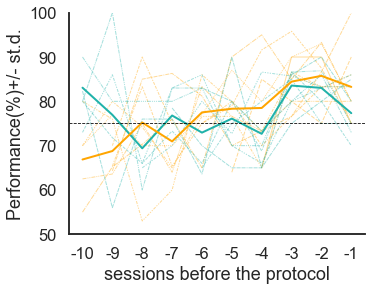

In [5]:
sns.set(style="white", context='talk')
plt.figure(dpi=300)

b = sns.relplot(kind='line', data=a.iloc[2:12].astype(float), linewidth=1, 
                legend=False, palette=['orange']*10+['lightseagreen']*8, alpha=.4, height=4, aspect=1.3)

sns.lineplot(data=ctrl_mean_perfs, color='lightseagreen', linewidth=2)
sns.lineplot(data=nphr_mean_perfs, color='orange', linewidth=2)

plt.axhline(75,linestyle='dashed', c='black', linewidth=.8)
b.set(ylim=[50,100], ylabel='Performance(%)+/- st.d.', xlabel='sessions before the protocol')
#     xticklabels=range(-10,0,1), xticks=range(-10,0,1))
sns.despine()

### Performance of groups in baseline

In [6]:
prestim_runs = test_runs[test_runs['stim_condition']==-1]
prestim_runs.head()

,session,rat,run_nr,start_timestamp,run_type,stim_condition,outcome,group,cp_entry_timestamp,cp_exit_timestamp,latency_to_cp_entry,latency_to_cp_exit,time_in_cp
164,2019-09-23T11_17_17,NPHR2,13.0,341.496461,T,-1,1.0,NPHR,448.159398,454.176358,106.662938,112.679898,6.016960
165,2019-09-23T11_17_17,NPHR2,15.0,619.674240,T,-1,1.0,NPHR,716.528026,721.910374,96.853786,102.236134,5.382349
166,2019-09-23T11_17_17,NPHR2,17.0,973.039245,T,-1,1.0,NPHR,1135.724877,1138.542259,162.685632,165.503014,2.817382
167,2019-09-23T11_17_17,NPHR2,19.0,1267.451738,T,-1,1.0,NPHR,1299.906368,1308.647603,32.454630,41.195866,8.741235
168,2019-09-23T11_17_17,NPHR2,21.0,1548.809088,T,-1,1.0,NPHR,1665.640986,1666.832717,116.831898,118.023629,1.191731


In [7]:
prestim_perf = prestim_runs.groupby(['group','rat', 'session']).apply(calc_performance_in_group).reset_index()
prestim_perf.rename({0:'performance'}, axis=1, inplace=True)
# Removal of runs decreased one of NPHR2 and CTRL5 performance in baseline. I will readjusted to the correct value
prestim_perf['performance'].iloc[[11, 27]]=75
prestim_perf[prestim_perf['performance']<75]

C:\Users\anasofiaccruz\Anaconda3\envs\ds\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,group,rat,session,performance
5,CTRL,CTRL3,2020-10-09T08_22_32,71.428571
8,CTRL,CTRL4,2020-11-19T14_40_31,70.000000


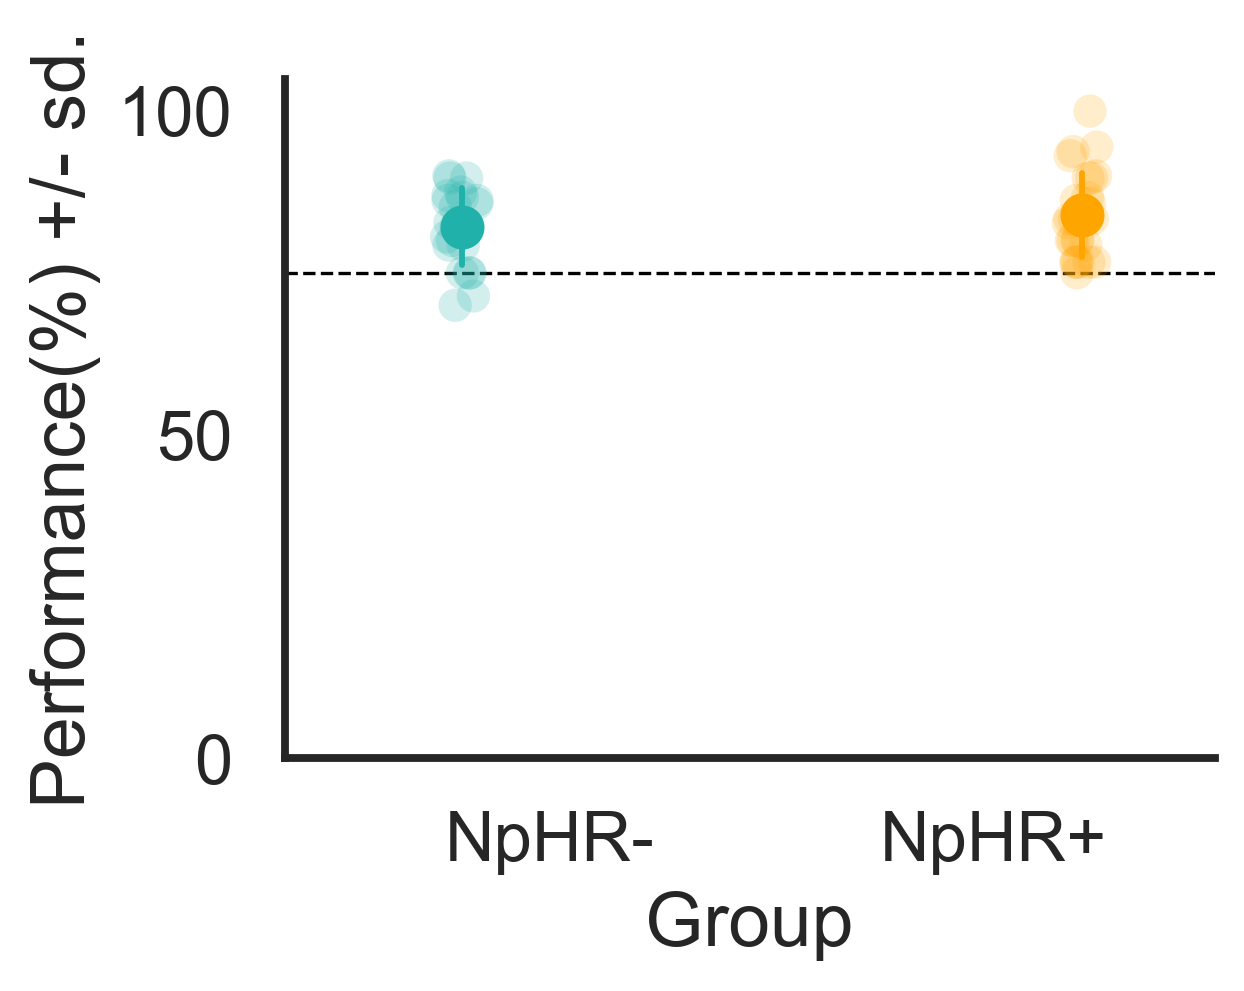

In [22]:
sns.set(style="white", context='talk')    
plt.figure(figsize=(4,3), dpi=300)

g = sns.stripplot(
    x='group', y='performance', hue='group',
    data=prestim_perf, dodge=.5, jitter=.07,
    alpha=.2, s=8, palette=['lightseagreen', 'orange'],
)

# Show means
sns.pointplot(
    x='group', y='performance', data=prestim_perf, hue='group',
    dodge=.4, join=False, markers="o", scale=.8,
    ci="sd", errwidth=1.4, palette=['lightseagreen', 'orange'],
    
)
plt.axhline(75,linestyle='dashed', c='black', linewidth=.8)
g.set(
    ylabel='Performance(%) +/- sd.', xlabel='Group',
    ylim=(0, 105), xlim=(-0.6, 1.5), xticklabels=['NpHR-', 'NpHR+'])

g.legend_.remove()
sns.despine()

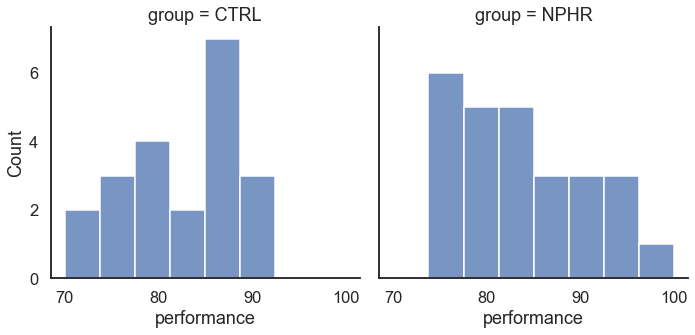

In [70]:
sns.displot(kind='hist',data=prestim_perf, col='group', x='performance')

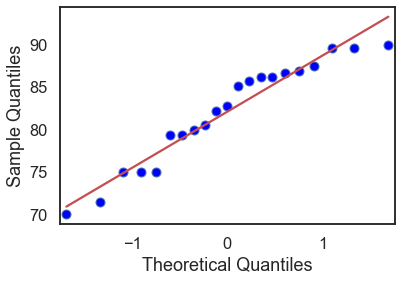

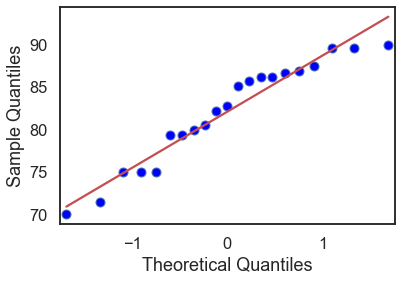

In [71]:
from statsmodels.graphics.gofplots import qqplot
qqplot(prestim_perf.loc[prestim_perf['group']=='CTRL', 'performance'], line='r')

In [72]:
from scipy.stats import mannwhitneyu, ttest_ind

mannwhitneyu(prestim_perf.loc[prestim_perf['group']=='NPHR', 'performance'],
             prestim_perf.loc[prestim_perf['group']=='CTRL', 'performance'])

MannwhitneyuResult(statistic=242.5, pvalue=0.2599966370727079)

In [73]:
ttest_ind(prestim_perf.loc[prestim_perf['group']=='NPHR', 'performance'],
      prestim_perf.loc[prestim_perf['group']=='CTRL', 'performance'])

Ttest_indResult(statistic=0.9986644341298833, pvalue=0.32329729935173934)

### Latency distributions

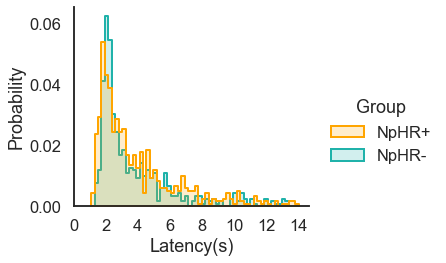

In [74]:
below15_runs = below15_runs[below15_runs['stim_condition']==-1]
sns.set(style='white', context='talk')

g = sns.displot(kind='hist', data=below15_runs, x='latency_to_cp_entry', 
                hue=below15_runs['group'].map({'CTRL':'NpHR-', 'NPHR':'NpHR+'}),
                stat='probability', element='step', palette=['orange', 'lightseagreen'], 
                bins=60, alpha=.2, height=4, aspect=1.2, linewidth=2)
g.set(xlabel='Latency(s)', xticks=range(0,16,2), xticklabels=range(0,16,2))
g._legend.set(title='Group')
sns.despine()

In [75]:
from scipy.stats import mannwhitneyu
ctrls = below15_runs[below15_runs['group']=='CTRL']
nphrs = below15_runs[below15_runs['group']=='NPHR']

mannwhitneyu(ctrls['latency_to_cp_entry'], nphrs['latency_to_cp_entry'])

MannwhitneyuResult(statistic=172453.0, pvalue=0.37319886831919724)

In [76]:
nphrs_percentiles = np.percentile(nphrs['latency_to_cp_entry'], range(0,101,1))
ctrls_percentiles = np.percentile(ctrls['latency_to_cp_entry'], range(0,101,1))

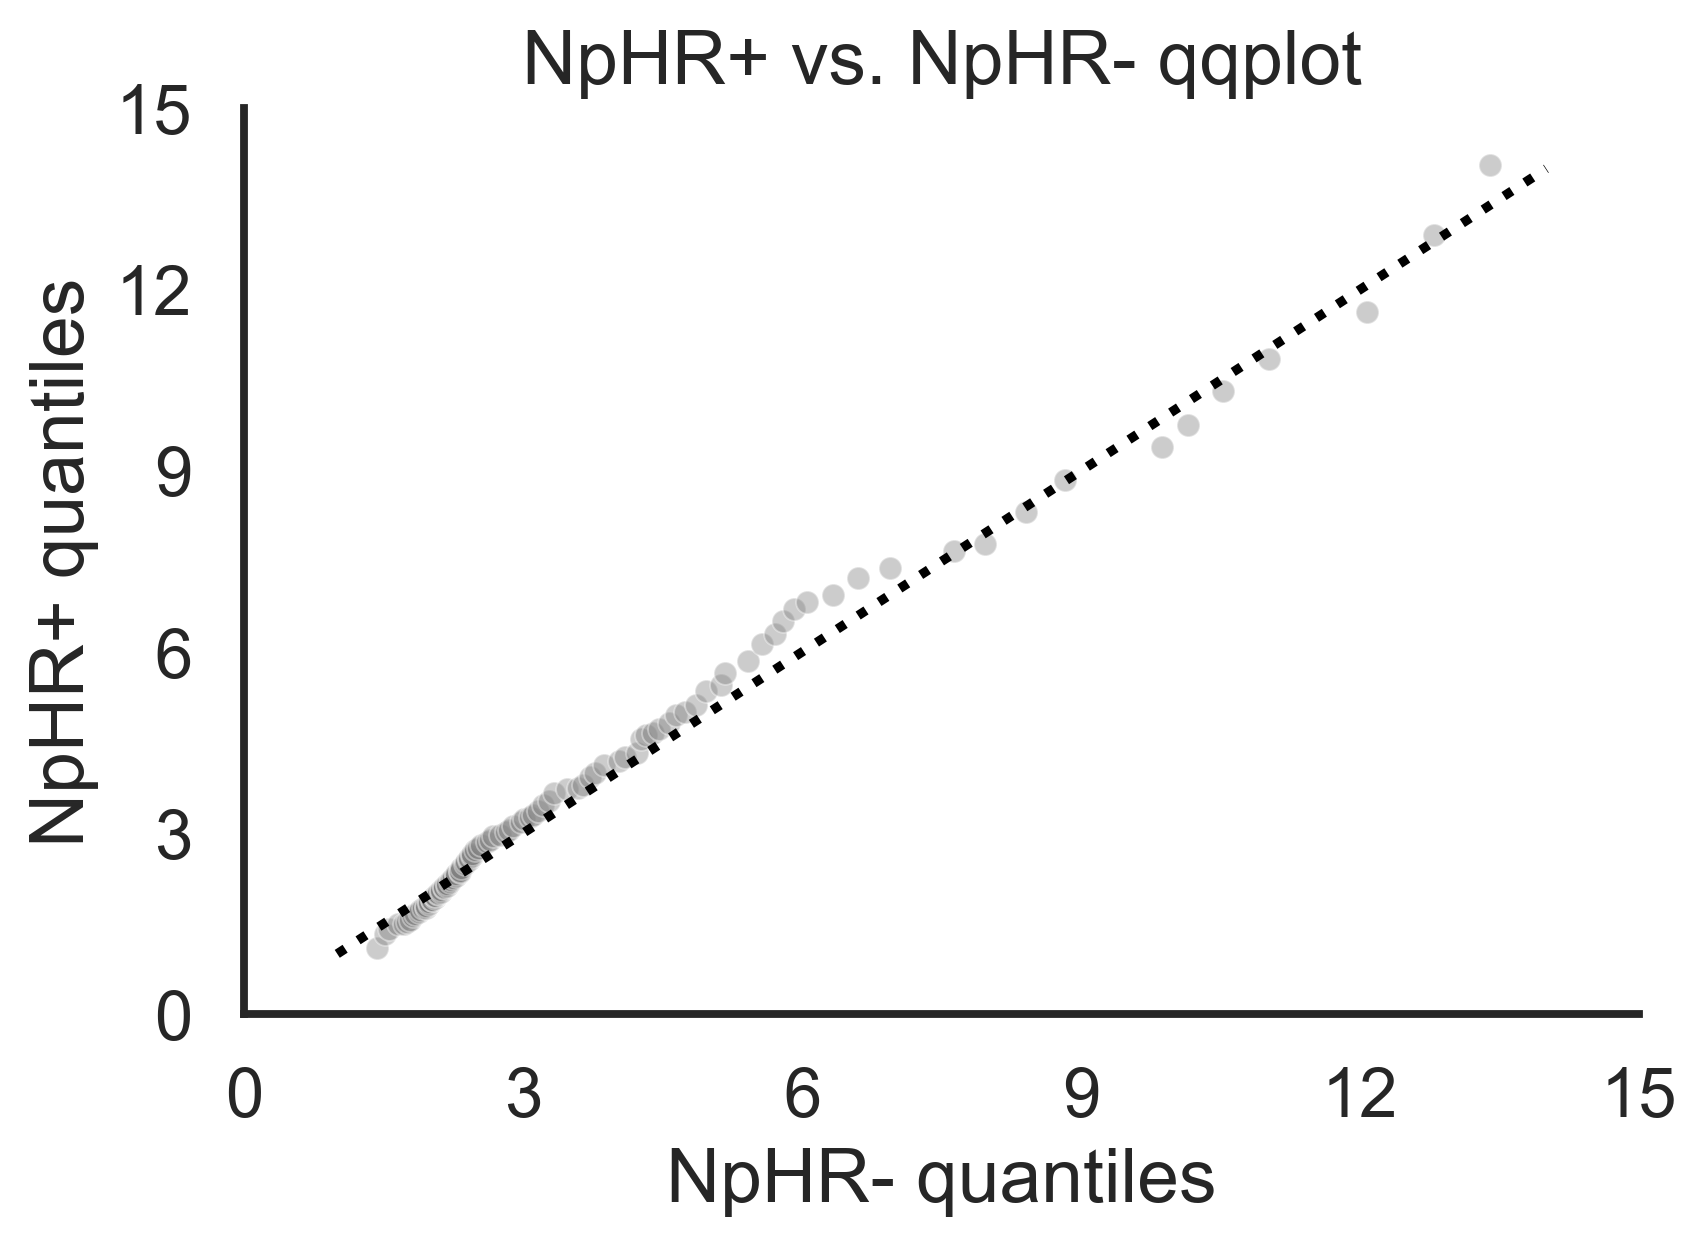

In [77]:
sns.set(style='white', context='talk')
plt.figure(dpi=300)
g = sns.scatterplot(x=ctrls_percentiles, y=nphrs_percentiles, s=30, alpha=.4, color='gray')

g.set(title='NpHR+ vs. NpHR- qqplot', xlabel='NpHR- quantiles', ylabel='NpHR+ quantiles', xlim=[0,15],
      ylim=[0,15],
      xticks=range(0,16,3), xticklabels=range(0,16,3), yticks=range(0,16,3), yticklabels=range(0,16,3))
plt.plot(range(1,15,1), range(1,15,1), linestyle='dotted', c='black')

sns.despine()

### Correct and error trials Latency distributions

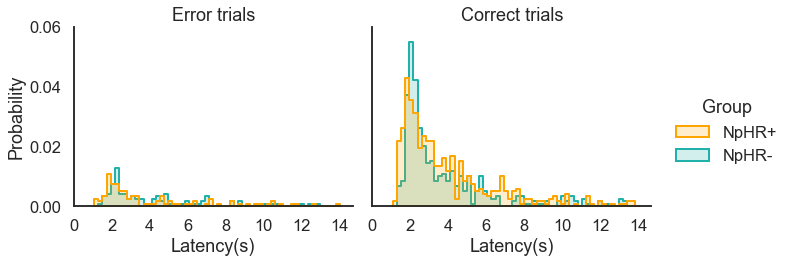

In [85]:
sns.set(style='white', context='talk')

g = sns.displot(kind='hist', data=below15_runs, col='outcome', x='latency_to_cp_entry', 
                hue=below15_runs['group'].map({'CTRL':'NpHR-', 'NPHR':'NpHR+'}),
                stat='probability', element='step', palette=['orange', 'lightseagreen'], 
                bins=60, alpha=.2, height=4, aspect=1.2, linewidth=2)
g.set(xlabel='Latency(s)', xticks=range(0,16,2), xticklabels=range(0,16,2))
g.set(xlabel='Latency(s)', xticks=range(0,16,2), xticklabels=range(0,16,2))
axes = g.axes.flatten()
axes[0].set(title="Error trials", ylim=[0, 0.02])
axes[1].set(title="Correct trials", ylim=[0,0.06])

g._legend.set(title='Group')
sns.despine()

In [79]:
# Using the Mann-Whitney test to compare medians in error trials
nphr_errors = below15_runs[(below15_runs['outcome']==0) & (below15_runs['group']=='NPHR')]
ctrl_errors = below15_runs[(below15_runs['outcome']==0) & (below15_runs['group']=='CTRL')]

u, p = mannwhitneyu(x=nphr_errors['latency_to_cp_entry'], y=ctrl_errors['latency_to_cp_entry'], 
                    alternative='two-sided')

print('Errors, Mann-Whitney result: '+str(u)+', p-value: '+str(p))

Errors, Mann-Whitney result: 4487.5, p-value: 0.25538539405213234


In [80]:
# Using the Mann-Whitney test to compare medians in correct trials
nphr_corrects = below15_runs[(below15_runs['outcome']==1) & (below15_runs['group']=='NPHR')]
ctrl_corrects = below15_runs[(below15_runs['outcome']==1) & (below15_runs['group']=='CTRL')]

u, p = mannwhitneyu(x=nphr_corrects['latency_to_cp_entry'], y=ctrl_corrects['latency_to_cp_entry'], 
                    alternative='two-sided')

print('Corrects, Mann-Whitney result: '+str(u)+', p-value: '+str(p))

Corrects, Mann-Whitney result: 124691.0, p-value: 0.33186354538345675


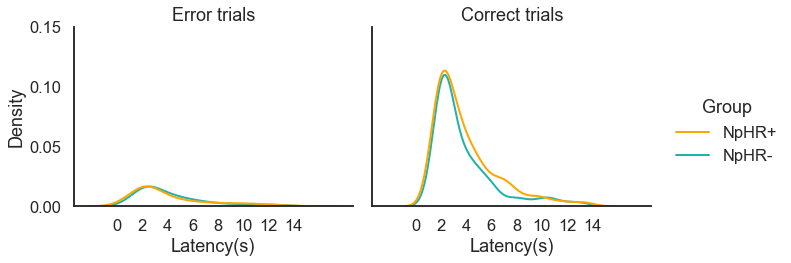

In [81]:
sns.set(style='white', context='talk')

g = sns.displot(kind='kde', data=below15_runs, col='outcome', x='latency_to_cp_entry', 
                hue=below15_runs['group'].map({'CTRL':'NpHR-', 'NPHR':'NpHR+'}),
                palette=['orange', 'lightseagreen'], 
                alpha=.2, height=4, aspect=1.2, linewidth=2)

g.set(xlabel='Latency(s)', xticks=range(0,16,2), xticklabels=range(0,16,2))
axes = g.axes.flatten()
axes[0].set(title="Error trials", ylim=[0, 0.02])
axes[1].set(title="Correct trials", ylim=[0,0.15])

g._legend.set(title='Group')
sns.despine()